# Data Visualization

![](https://i.pcmag.com/imagery/articles/02Xkt5sp3fVl5rGUtk3DXMi-7.fit_scale.size_1028x578.v1569485349.jpg)

Inspiration from https://www.kaggle.com/subinium/simple-matplotlib-visualization-tips <br><br>
Great guide for visualization newbies :)

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from time import time

In [2]:
root = '../input/coronavirusdataset'
os.listdir(root)

['patient.csv', 'time.csv', 'trend.csv', 'route.csv']

In [3]:
pd.options.display.float_format = '{:.2f}'.format

patient = pd.read_csv(root+'/patient.csv', engine='python')
time_df = pd.read_csv(root+'/time.csv', engine='python')
route = pd.read_csv(root+'/route.csv', engine='python')

patient.head(3)

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.00,China,filtered at airport,nan,NaN,visit to Wuhan,1.00,nan,45.00,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.00,Korea,filtered at airport,nan,NaN,visit to Wuhan,1.00,nan,75.00,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.00,Korea,capital area,nan,NaN,visit to Wuhan,1.00,nan,16.00,2020-01-26,2020-02-12,NaN,released


In [4]:
patient.drop_duplicates(subset=['region', 'infection_reason', 'state']).head(3)

,id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.00,China,filtered at airport,nan,NaN,visit to Wuhan,1.00,nan,45.00,2020-01-20,2020-02-06,NaN,released
2,3,male,1966.00,Korea,capital area,nan,NaN,visit to Wuhan,1.00,nan,16.00,2020-01-26,2020-02-12,NaN,released
5,6,male,1964.00,Korea,capital area,nan,NaN,contact with patient,2.00,3.00,17.00,2020-01-30,2020-02-19,NaN,released


## Creating Figures

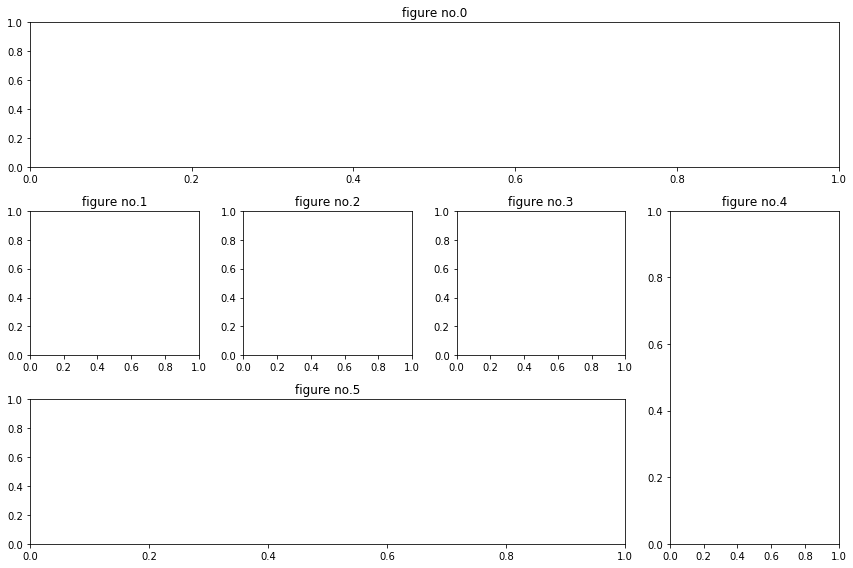

In [5]:
fig = plt.figure(figsize=(12,8))
axes = [None for i in range(6)]

axes[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
axes[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
axes[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
axes[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
axes[4] = plt.subplot2grid((3,4), (1,3), colspan=1, rowspan=2)
axes[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for i in range(len(axes)):
    axes[i].set_title("figure no.%d"%i)

fig.tight_layout()
plt.show()

## Sensual Heatmap

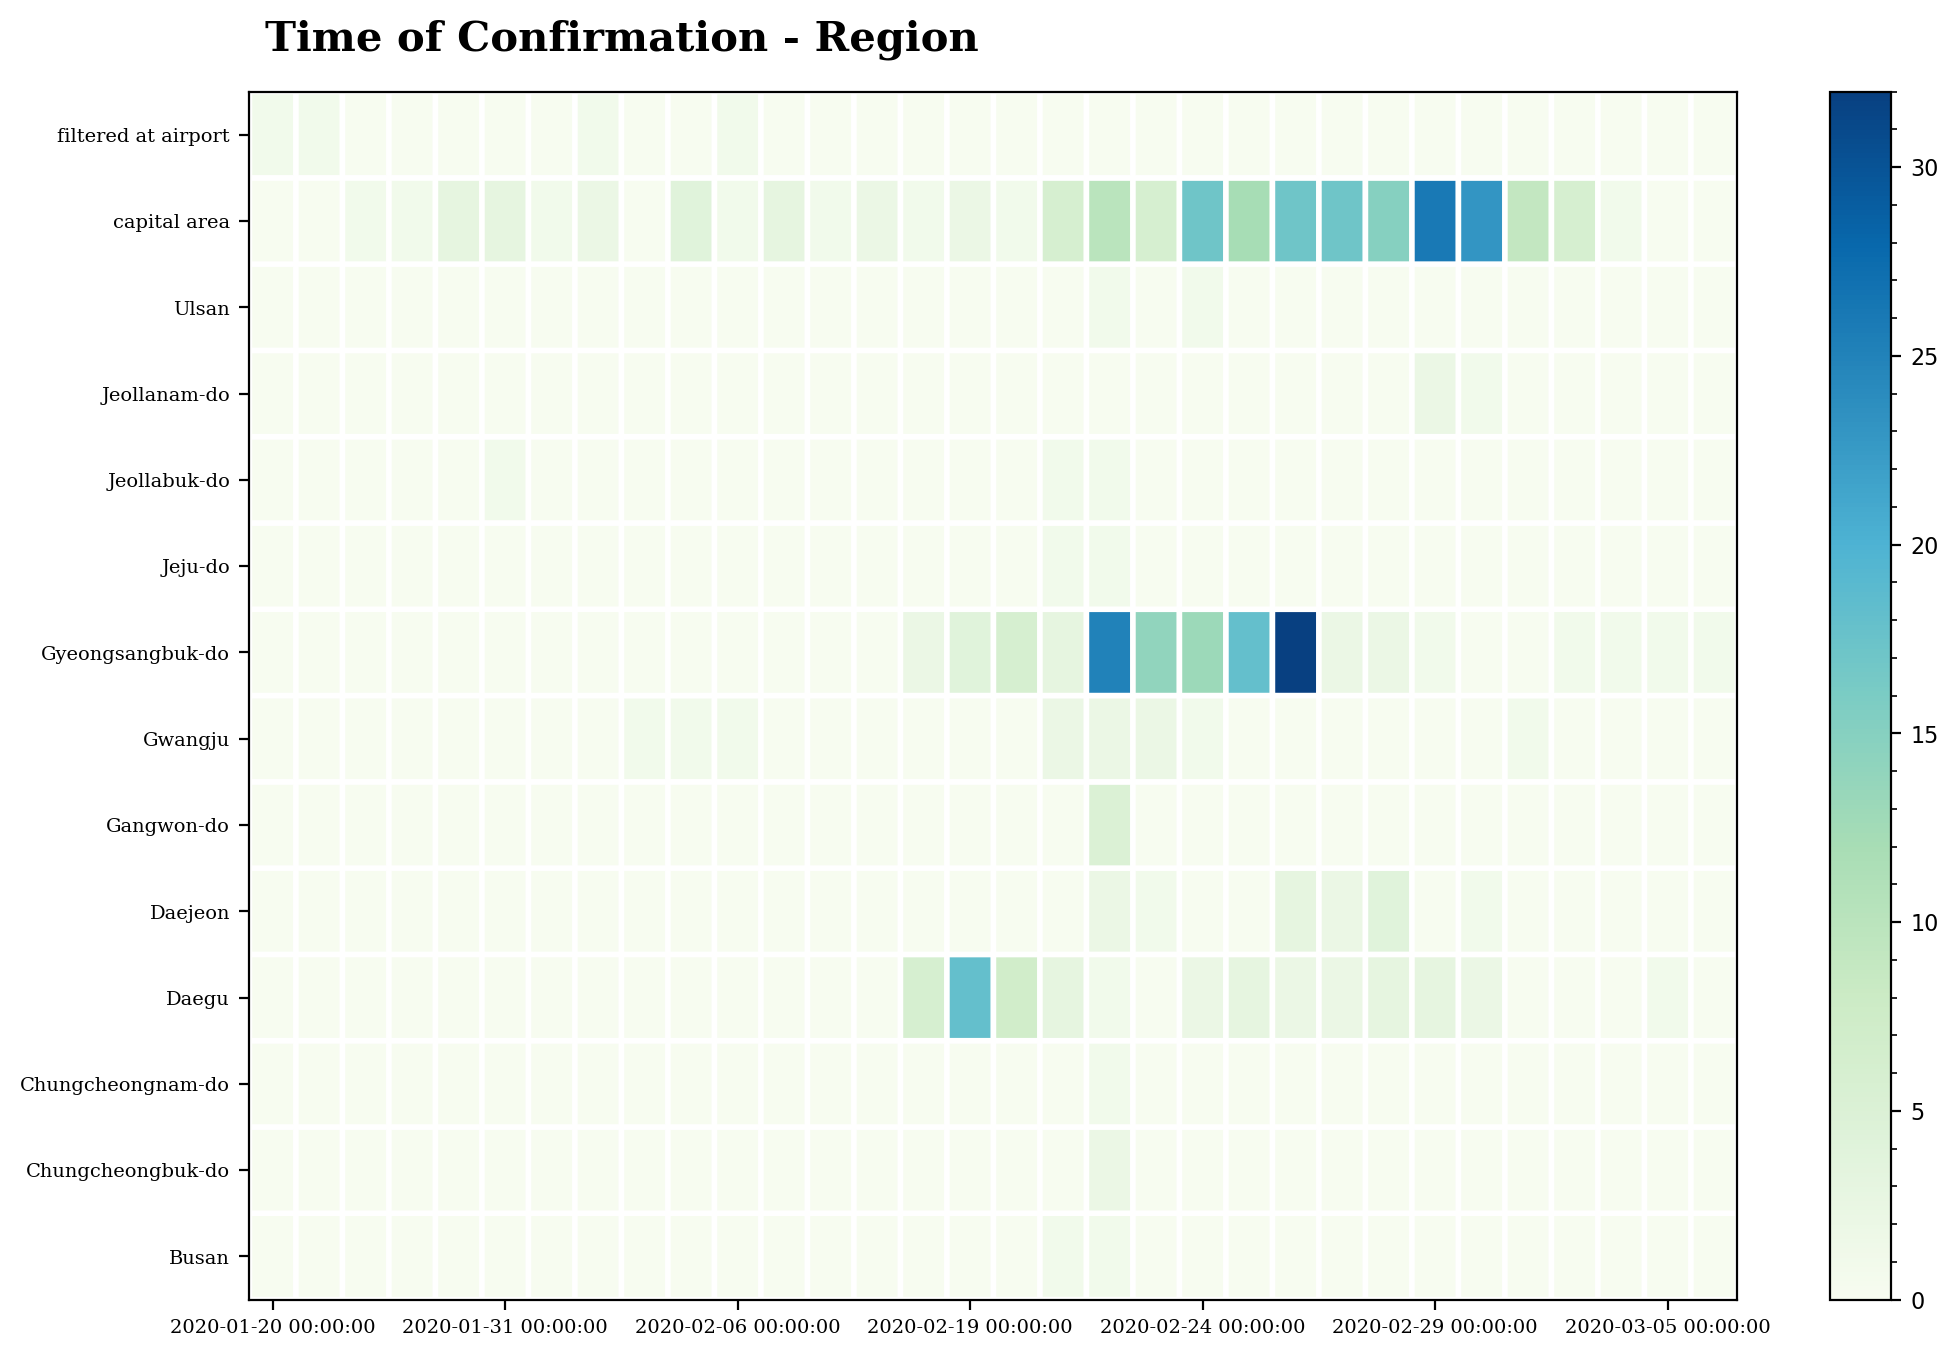

In [6]:
patient = patient.sort_values(by='confirmed_date', ascending=True)
patient['confirmed_date'] = patient['confirmed_date'].apply(lambda x: pd.to_datetime(x))
# patient['confirmed_date'].fillna(datetime(2020, 3, 3, 0,0,0))
# patient['region'].fillna('N/A')

df = patient.groupby('confirmed_date')['region'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(12,8), dpi=200)
plt.pcolor(df, cmap='GnBu', edgecolors='white', linewidth=2)
plt.xticks(np.arange(0.5, len(df.columns), 5), df.columns[::5], fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
plt.title("Time of Confirmation - Region", fontsize=15, fontweight='bold', fontfamily='serif', position=(0.25, 1.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

In [7]:
df2 = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
df2.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [8]:
df2.dropna(subset=['date_added'], inplace=True)

In [9]:
df2['added_month'] = df2['date_added'].apply(lambda x: x.split()[0])
df2['added_year'] = df2['date_added'].apply(lambda x: x.split()[-1])
df2.drop(columns=['date_added'], inplace=True)

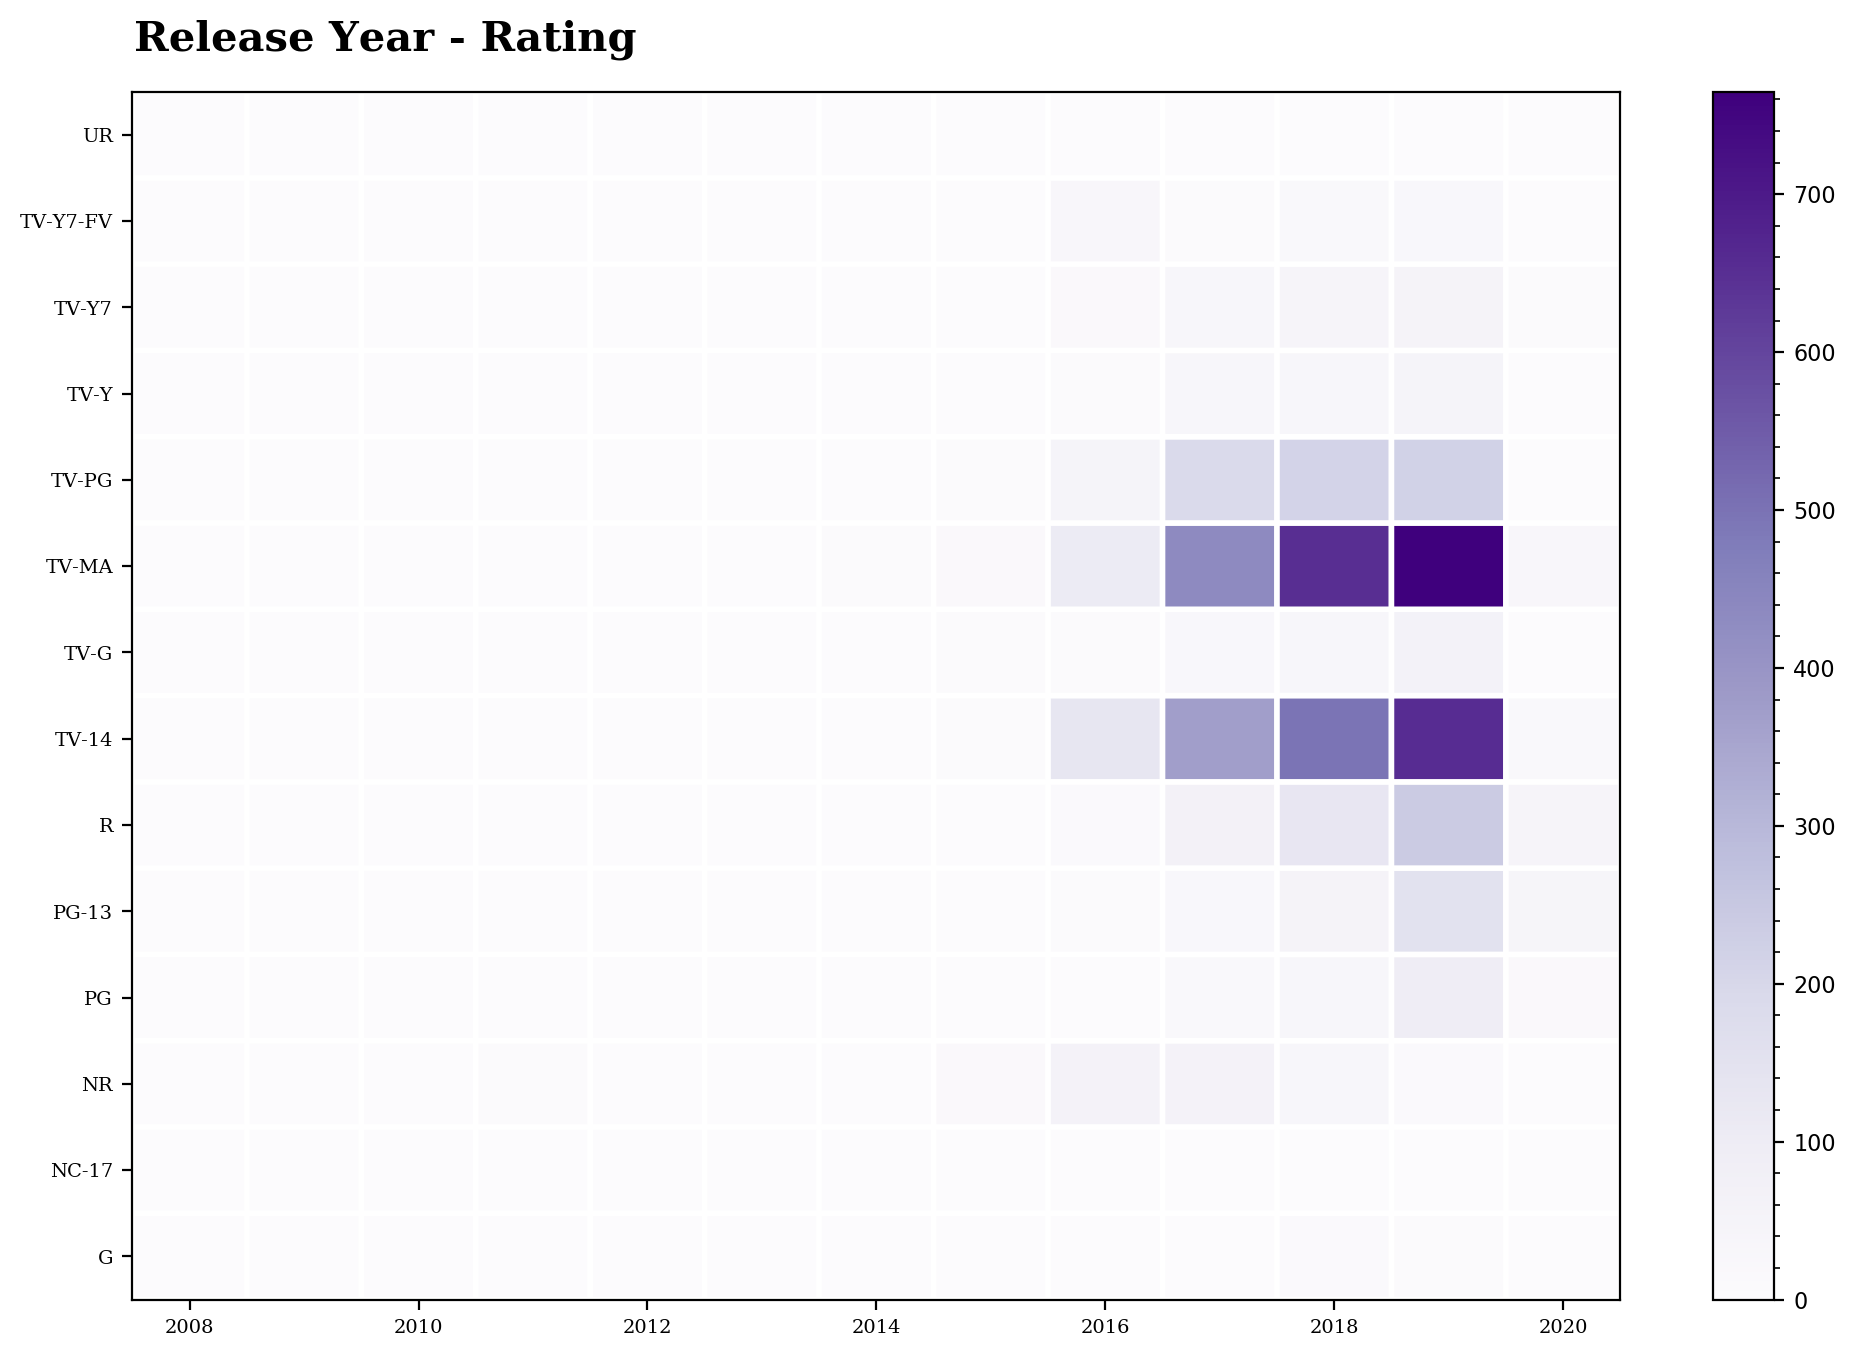

In [10]:
df = df2.groupby('added_year')['rating'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(12,8), dpi=200)
plt.pcolor(df, cmap='Purples', edgecolors='white', linewidth=2)
plt.xticks(np.arange(0.5, len(df.columns), 2), df.columns[::2], fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
plt.title("Release Year - Rating", fontsize=15, fontweight='bold', fontfamily='serif', position=(0.17, 1.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

## Barplots with Emphasis

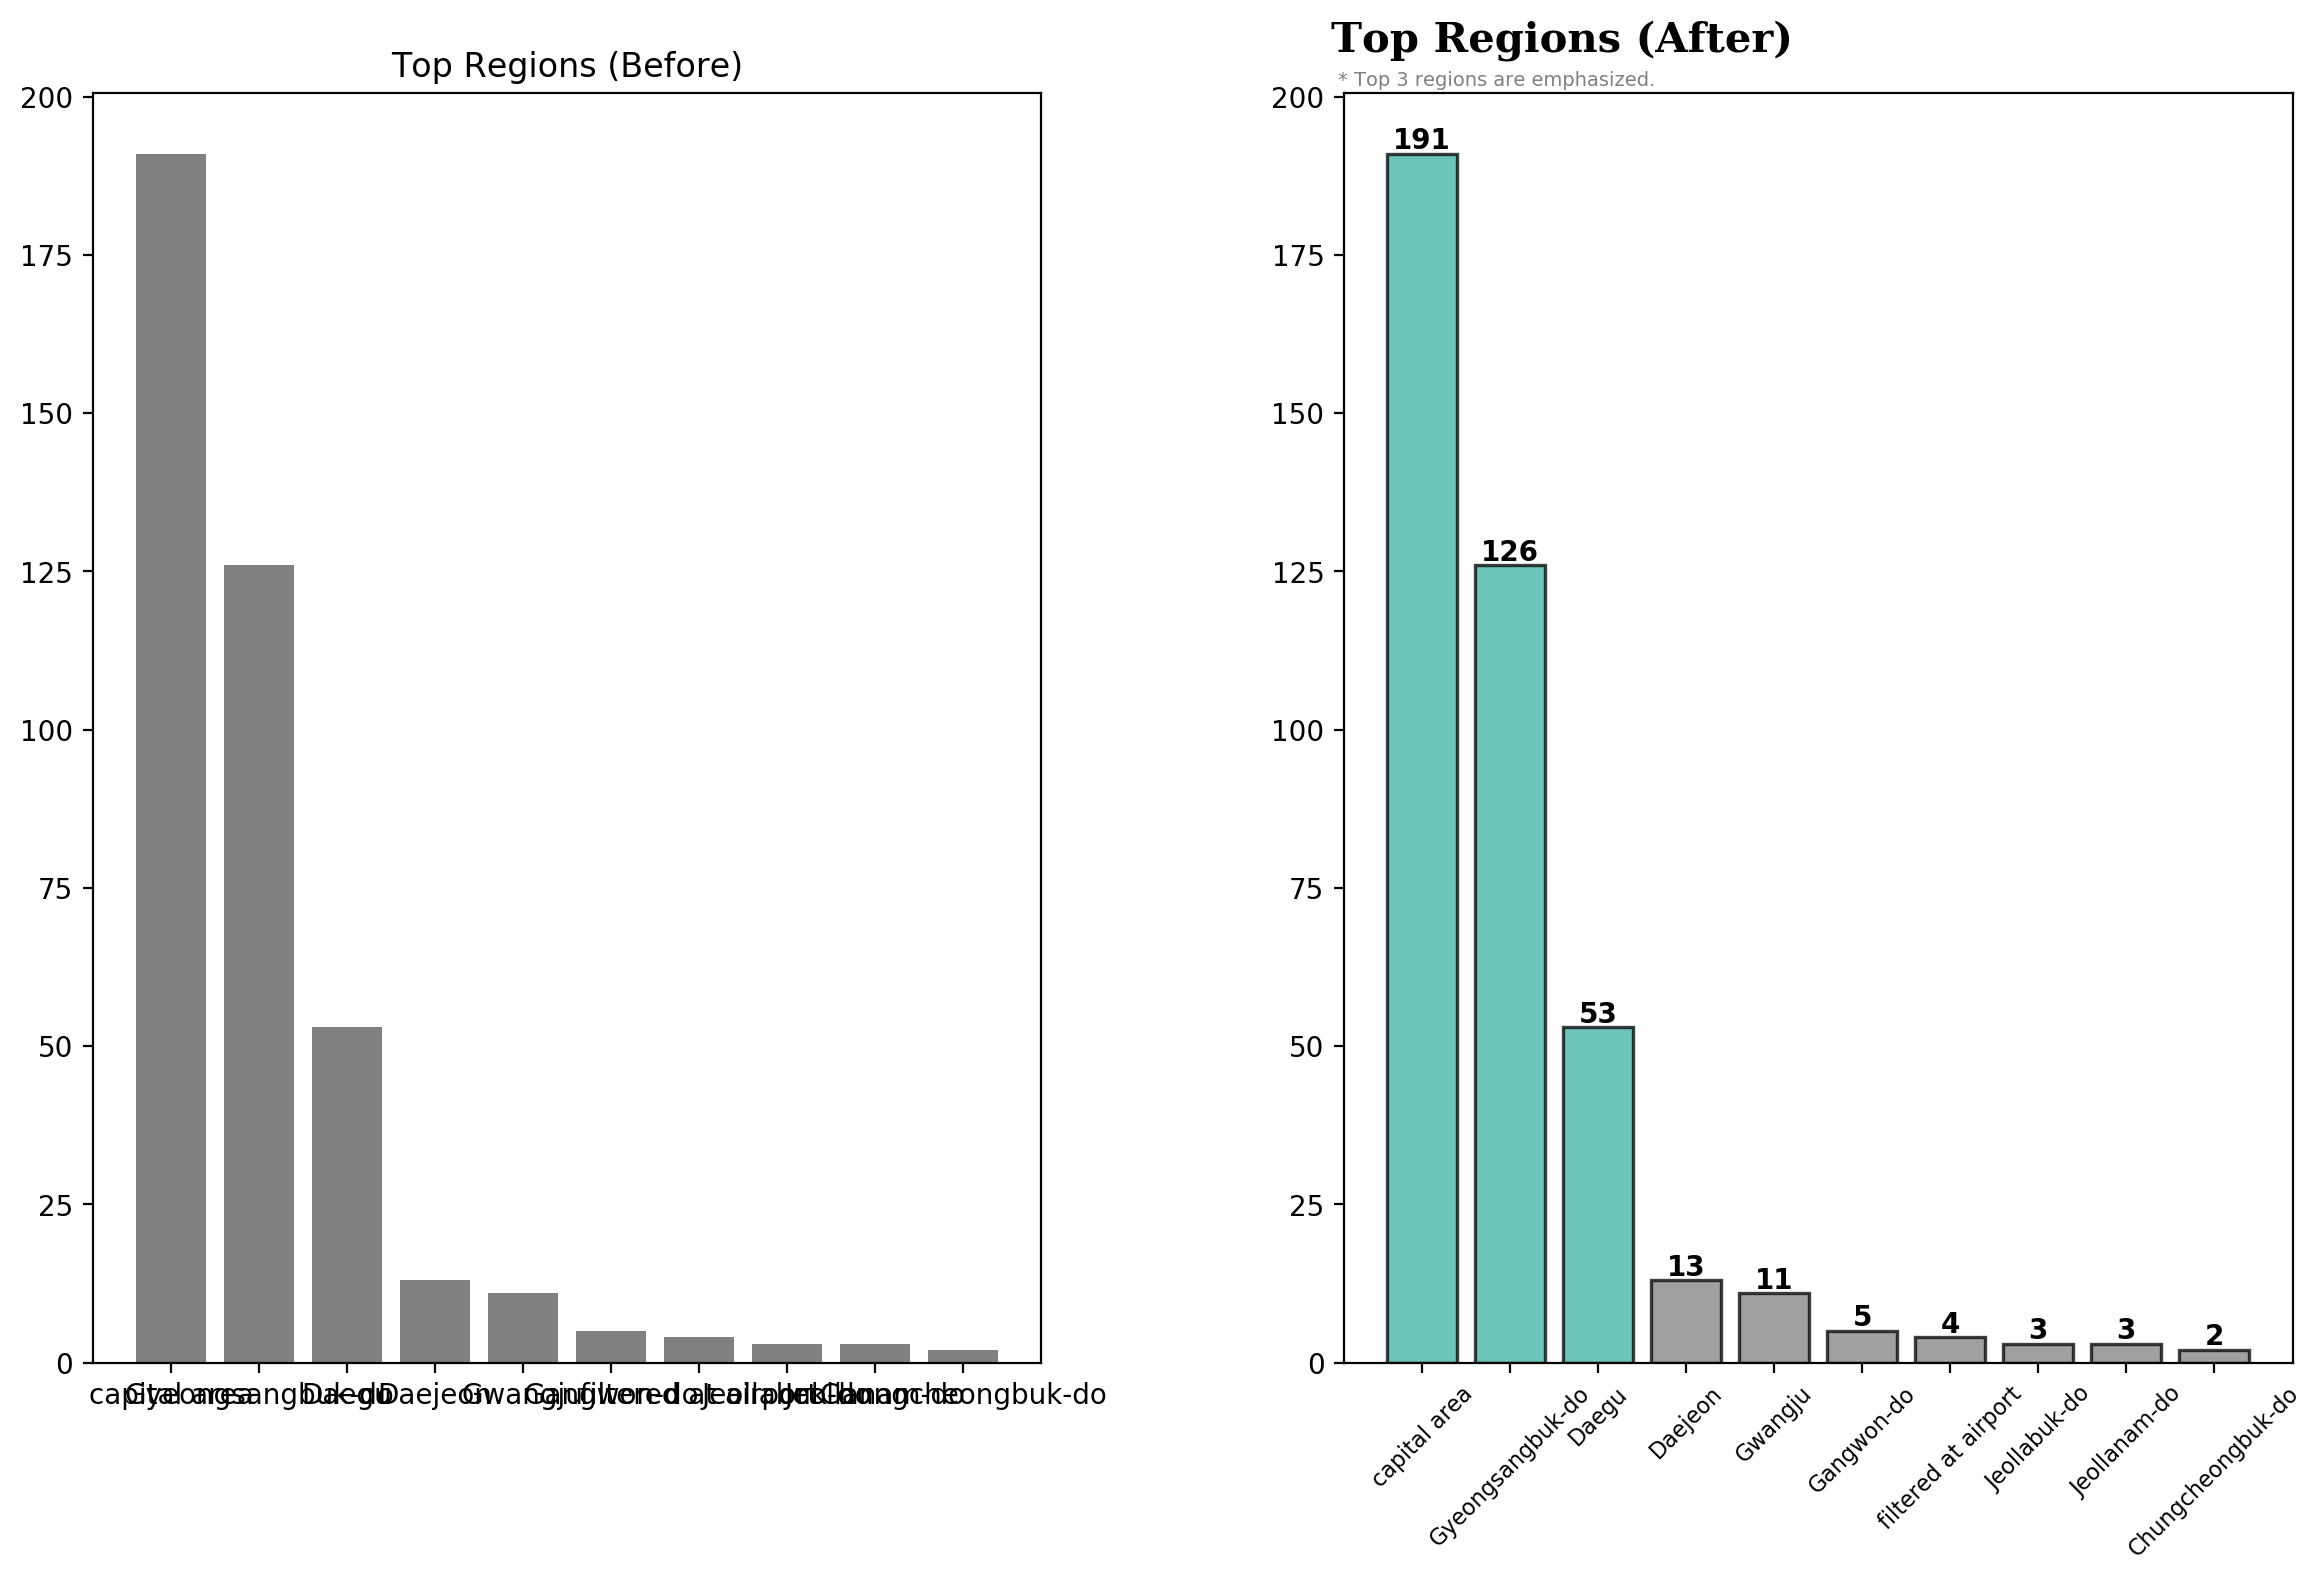

In [11]:
top_reg = patient['region'].value_counts().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(1,2, figsize=(12,8), dpi=200)
# sns.set_style('whitegrid')

ax[0].bar(top_reg.index, top_reg, color='grey')
ax[0].set_title('Top Regions (Before)')

cmap = ['gray' for i in range(10)]
cmap[0] = cmap[1] = cmap[2] = '#3caea3'
ax[1].bar(top_reg.index, top_reg, alpha=0.75, width=0.8, linewidth=1.2, edgecolor='black', color=cmap)
ax[1].set_title("Top Regions (After)", fontsize=15, fontweight='bold', fontfamily='serif', position=(0.23, 1.02))
ax[1].set_xticklabels(labels=top_reg.index, rotation=45, fontsize=8)

for i in top_reg.index:
    ax[1].annotate("{:.0f}".format(top_reg[i]), xy=(i, top_reg[i]+2), va='center', ha='center', fontweight='bold', color='black')
    
plt.suptitle('* Top 3 regions are emphasized.', color='gray', x=0.63, y=0.95, fontsize=7)
plt.subplots_adjust(left=0.5, right=0.8)
plt.tight_layout()
plt.show()

## Barplot with Span Illustration

In [12]:
df3 = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df3.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


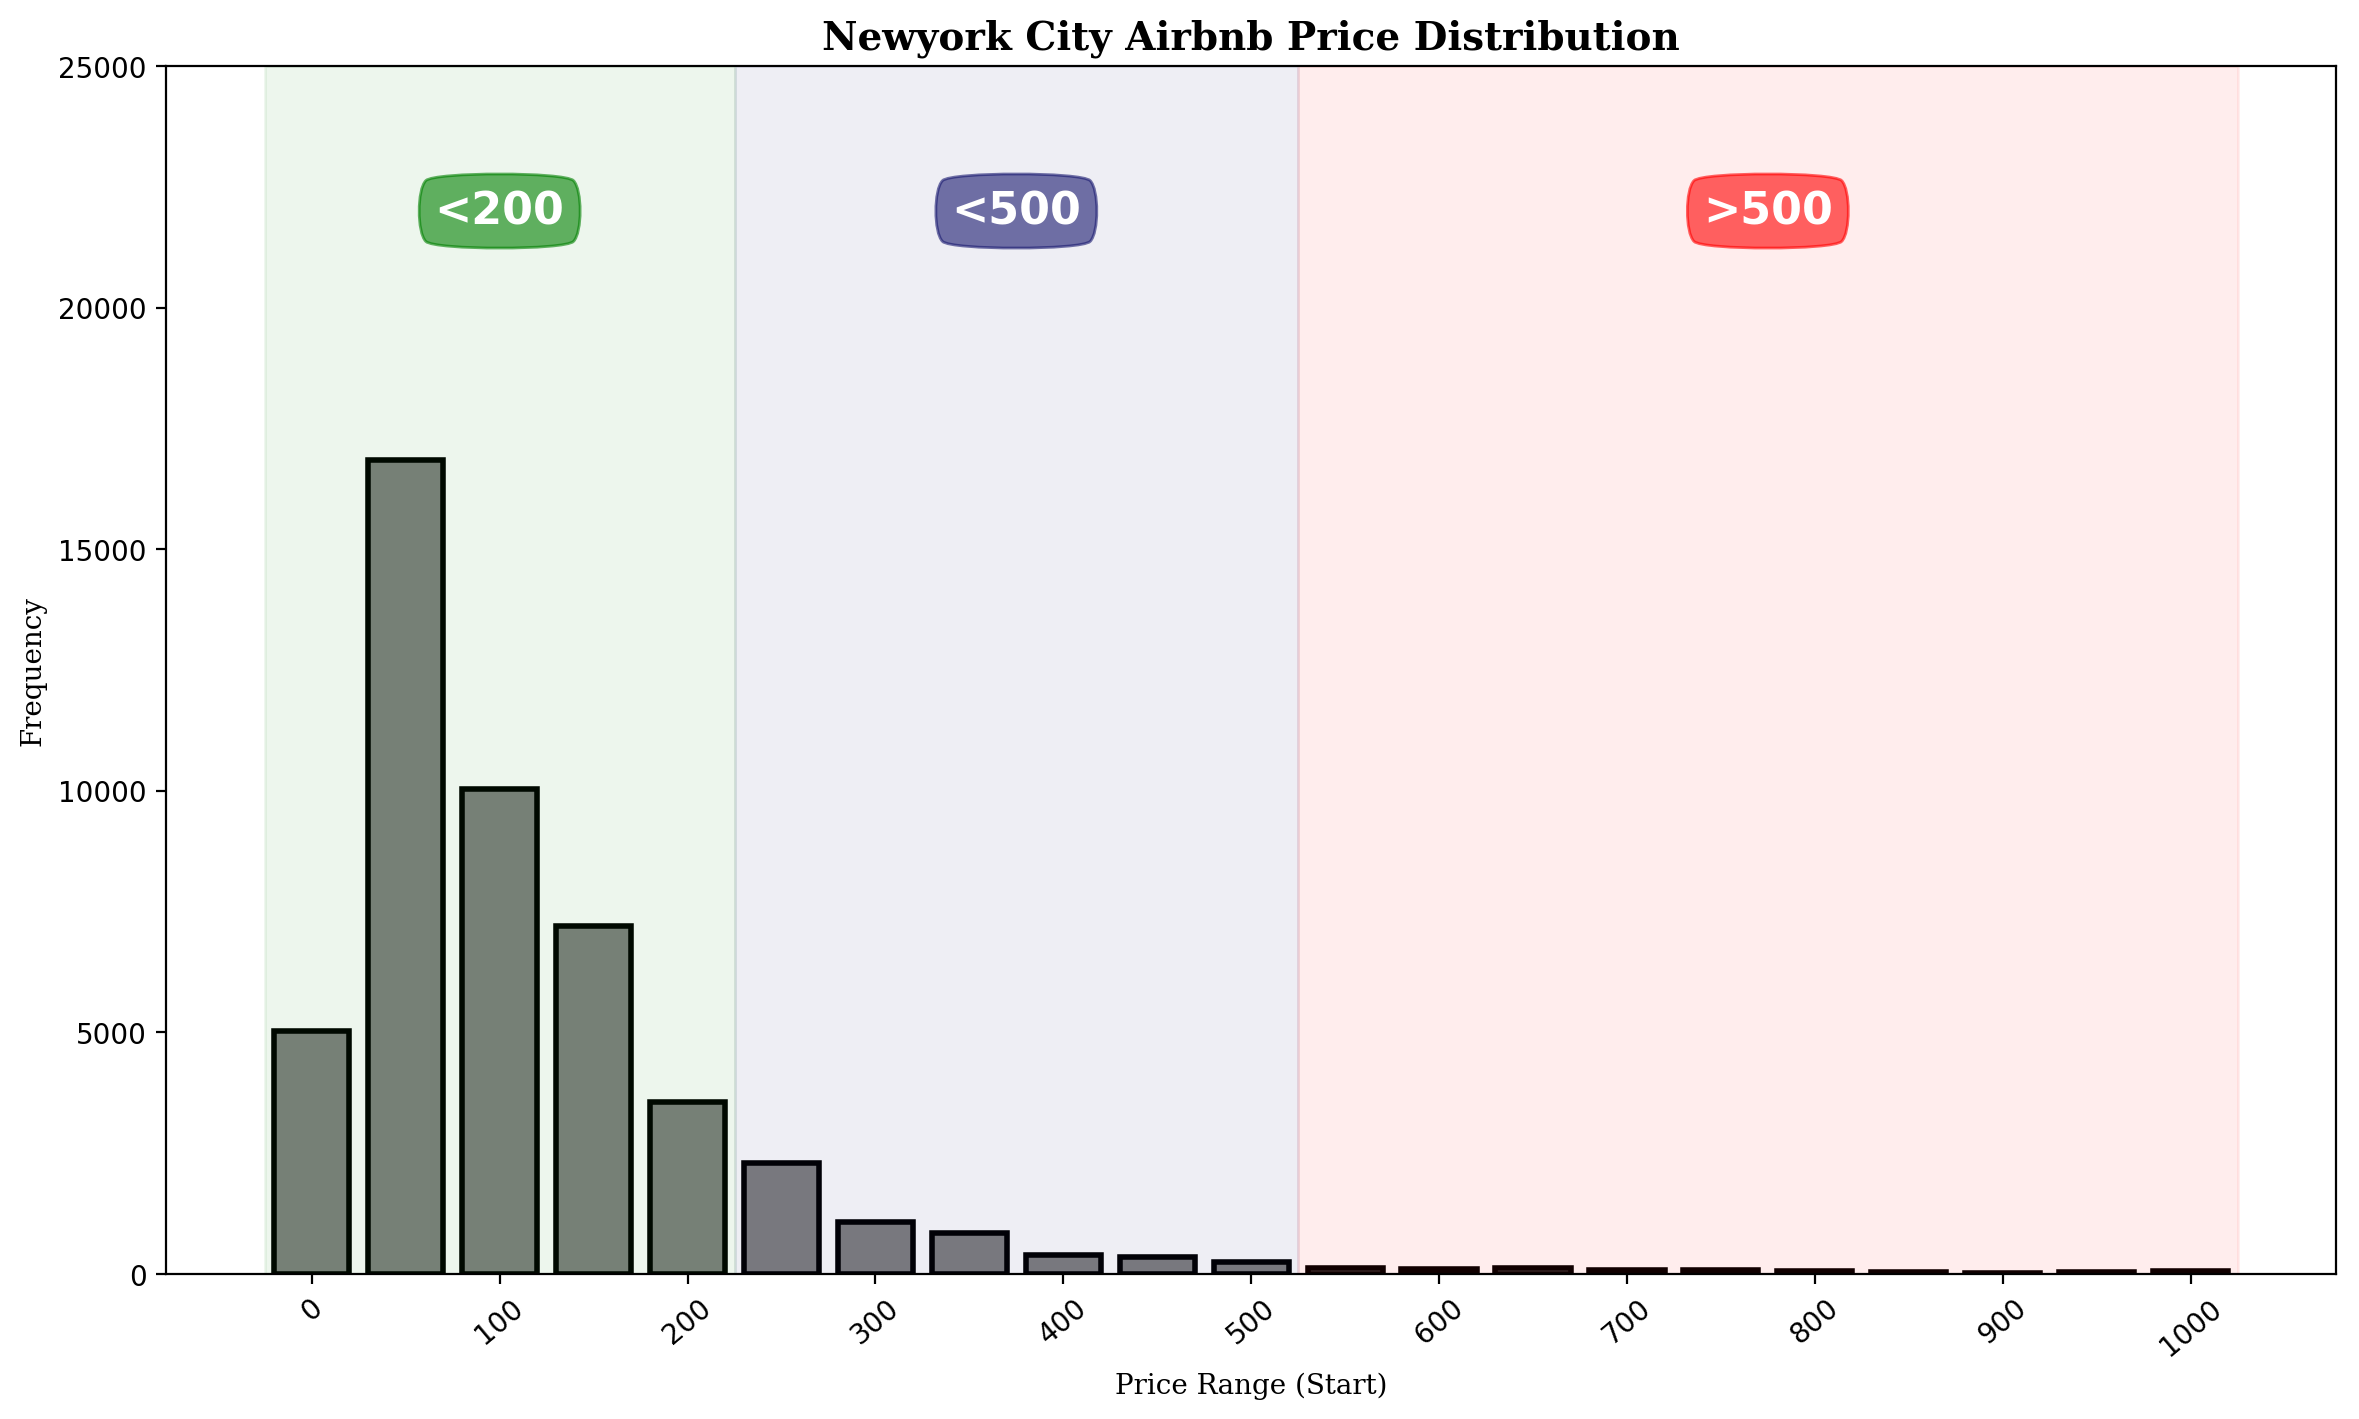

In [13]:
df3 = df3[df3['price']<1050]
df3['price_range'] = df3['price'].apply(lambda x: x//50)
df3 = df3.sort_values(by='price_range')
X = df3['price_range'].value_counts().sort_index()

plt.figure(figsize=(14, 8), dpi=200)
plt.ylim(0, 25000)
plt.title("Newyork City Airbnb Price Distribution", fontfamily='serif', fontweight='bold', fontsize=14)
plt.bar(X.index, X, color='gray', edgecolor='black', linewidth=2)
plt.xticks([2*i for i in range(11)], [100*i for i in range(11)], rotation=40)
plt.xlabel(xlabel='Price Range (Start)', fontfamily='serif')
plt.ylabel(ylabel='Frequency', fontfamily='serif')

span_range = [[0, 4], [5, 10], [11, 20]]
color=['green', 'midnightblue', 'red']


for idx, sub_title in enumerate(['<200', '<500', '>500']):
    plt.annotate(sub_title,
                xy=(sum(span_range[idx])/2 ,22000),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
    plt.axvspan(span_range[idx][0]-0.5,span_range[idx][1]+0.5,  color=color[idx], alpha=0.07)

# plt.axvspan(-0.5, 3.5, facecolor='blue', alpha=0.5)
plt.show()

## Comparable Scatterplot

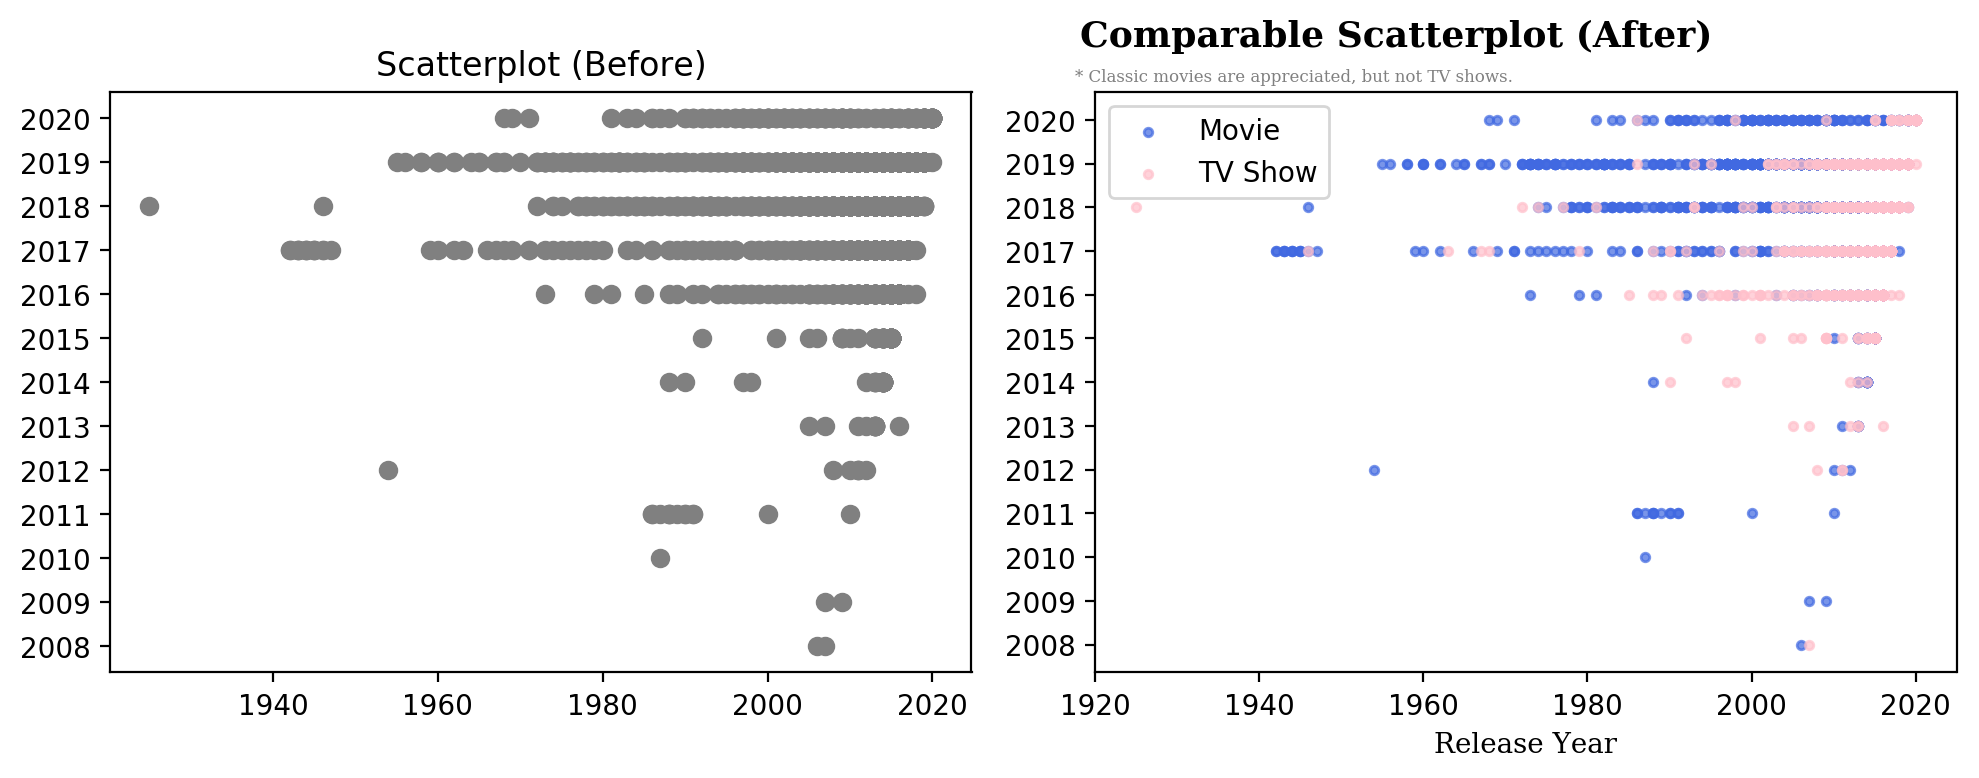

In [14]:
df2 = df2.sort_values(by=['added_year', 'release_year'])

fig, ax = plt.subplots(1,2, figsize=(10,4), dpi=200)

ax[0].scatter(df2['release_year'], df2['added_year'], color='gray')
ax[0].set_title("Scatterplot (Before)")

mv = df2[df2['type']=='Movie']
tv = df2[df2['type']=='TV Show']
ax[1].scatter(mv['release_year'], mv['added_year'], s=9.5, alpha=0.7, color='royalblue', label='Movie')
ax[1].scatter(tv['release_year'], tv['added_year'], s=9.5, alpha=0.7, color='pink', label='TV Show')
ax[1].set_title("Comparable Scatterplot (After)", fontfamily='serif', fontweight='bold', fontsize=13, position=(0.35, 1.05))
ax[1].set_xlabel("Release Year", fontfamily='serif', fontsize=10)
# ax[1].set_yticklabels(np.arange(0.5, len(set(df2['added_year'])), 2), sorted(list(set(df2['added_year'])))[::2], fontfamily='serif')
plt.suptitle("* Classic movies are appreciated, but not TV shows.", color='gray', fontsize=6, position=(0.652, 0.9), fontfamily='serif')
ax[1].legend()

plt.tight_layout()
plt.show()